### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
pd.set_option('max_columns', 100)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')



In [3]:
sets = [visits,orders,costs]
set_name = ['Visits','Orders','Costs']

def show_sets (dfs):
    for i in range (0, len(dfs)):
        print('')
        print('============================================================================================')
        print('')
        print( set_name[i],'data overview' )
        display(dfs[i].head())

        print('')
        print(set_name[i], 'size of DataFrame:', dfs[i].shape)
        print('')

        print( set_name[i], 'check the Dtype and Null values')
        dfs[i].info()
        print('')
        print('Number of dulplicates:', len(dfs[i][dfs[i].duplicated()==True]))

show_sets(sets)        



Visits data overview


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Visits size of DataFrame: (309901, 6)

Visits check the Dtype and Null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Number of dulplicates: 0


Orders data overview


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Orders size of DataFrame: (40212, 3)

Orders check the Dtype and Null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Number of dulplicates: 0


Costs data overview


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Costs size of DataFrame: (1800, 3)

Costs check the Dtype and Null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Number of dulplicates: 0


First observation has showed no null values and no duplicates in data. 

Our next step will be transform data sets. We will change the name of columns to one standard (lower case, underscore) and change date columns to dt format

+++ Kostyan pomenyai cvet +++

In [4]:
for a in sets:
    
    col = list(a.columns)
    
    new_col = [] 
    
    for i in a:
    
        i = i.lower().replace(' ','_')
        new_col += [i]  
    a.columns = new_col
    display(a.head())

visits['session_start'] = visits['session_start'].astype('datetime64[ns]')
visits['session_end'] = visits['session_end'].astype('datetime64[ns]')
orders['event_dt'] = orders['event_dt'].astype('datetime64[ns]')
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


After all changes lets recheck all data sets

In [5]:
show_sets(sets)
    



Visits data overview


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Visits size of DataFrame: (309901, 6)

Visits check the Dtype and Null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

Number of dulplicates: 0


Orders data overview


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Orders size of DataFrame: (40212, 3)

Orders check the Dtype and Null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB

Number of dulplicates: 0


Costs data overview


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Costs size of DataFrame: (1800, 3)

Costs check the Dtype and Null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Number of dulplicates: 0


Data clearence and transformation is compleeted. It is a time to start our analysis

EDA analysis of datasets:

Fisrt we analyse visits.

Check of Time properties of visits. 
First time window

In [6]:
visits = visits.sort_values(by='session_start', ascending=True)
display(visits.head(5))

,user_id,region,device,channel,session_start,session_end
461,382394863972,United States,Mac,MediaTornado,2019-05-01 00:00:41,2019-05-01 01:13:45
207360,428935481941,UK,PC,AdNonSense,2019-05-01 00:01:35,2019-05-01 02:30:30
207335,86266511938,Germany,Android,organic,2019-05-01 00:02:38,2019-05-01 01:22:33
207379,763000657462,UK,PC,organic,2019-05-01 00:04:21,2019-05-01 00:24:15
207599,791058813280,France,Android,LeapBob,2019-05-01 00:05:17,2019-05-01 01:14:51


We can see that in our dataset we have 6 complete months from 1.st of May untill end of October. 

Next step we will check the session duration and clean 0 s. visits. 

In [7]:
visits['ses_len_min'] = (visits['session_end'] - visits['session_start'])
visits['ses_len_min'] = round(visits['ses_len_min'].dt.total_seconds()/60,2)

display(visits.query('ses_len_min == 0.0'))

visits = visits.query('ses_len_min != 0.0')




,user_id,region,device,channel,session_start,session_end,ses_len_min
396,70966634103,United States,iPhone,FaceBoom,2019-05-01 10:09:06,2019-05-01 10:09:06,0.0
100,172991619815,United States,Android,organic,2019-05-01 23:30:20,2019-05-01 23:30:20,0.0
209655,573748811018,France,Android,LeapBob,2019-05-06 09:09:57,2019-05-06 09:09:57,0.0
6418,237822984474,United States,iPhone,FaceBoom,2019-05-08 11:44:29,2019-05-08 11:44:29,0.0
7658,691394091917,United States,iPhone,organic,2019-05-09 19:23:10,2019-05-09 19:23:10,0.0
...,...,...,...,...,...,...,...
196527,161519701243,United States,iPhone,TipTop,2019-10-22 03:38:36,2019-10-22 03:38:36,0.0
197164,93591440376,United States,Mac,TipTop,2019-10-22 09:46:47,2019-10-22 09:46:47,0.0
200917,438102959279,United States,Mac,FaceBoom,2019-10-25 13:37:39,2019-10-25 13:37:39,0.0
202548,143097745137,United States,iPhone,organic,2019-10-26 17:25:06,2019-10-26 17:25:06,0.0


We have find out that in our log there are 163 sessions with 0 duration. It is a less then a 0.1% of our total data, probably no purchases made during these sessions. Therefore, we drop them as irrelevant for the EDA analysis. However, this sessions could be checked by data engenieers.

In [8]:
display(visits['ses_len_min'].describe())
print('')
print('Median:',visits['ses_len_min'].median())
print('90-95-99 percentile:', np.percentile(visits['ses_len_min'],[90,95,99]))


count    309738.000000
mean         30.017310
std          30.051075
min           0.020000
25%           8.630000
50%          20.730000
75%          41.620000
max         370.950000
Name: ses_len_min, dtype: float64


Median: 20.73
90-95-99 percentile: [ 69.08    90.07   138.0263]


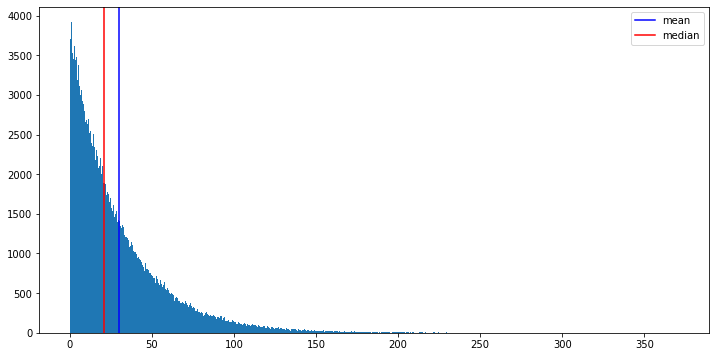

In [9]:
plt.figure(figsize=(12,6))
plt.hist(visits["ses_len_min"], bins = 1000)
plt.axvline(x = visits['ses_len_min'].mean() , color = 'b', label = 'mean')
plt.axvline(x = visits['ses_len_min'].median() , color = 'r', label = 'median')
plt.legend(loc='upper right')
plt.show()

Average duration is 30 min, Meadian is 20 min. Standard deviation 30. The 10 % of longest sessions took over 1h 10m  

===== Second we analyze devices. To make full analysis first we merge visits and orders to identify people who completed purchases. Then we will find the users and customers ratio of channels and regions =====

Check if any users counted in more channels or regions

In [10]:
visits['customer'] = visits['user_id'].isin(orders['user_id'].unique()).astype(int)
display(visits.head())

,user_id,region,device,channel,session_start,session_end,ses_len_min,customer
461,382394863972,United States,Mac,MediaTornado,2019-05-01 00:00:41,2019-05-01 01:13:45,73.07,0
207360,428935481941,UK,PC,AdNonSense,2019-05-01 00:01:35,2019-05-01 02:30:30,148.92,0
207335,86266511938,Germany,Android,organic,2019-05-01 00:02:38,2019-05-01 01:22:33,79.92,0
207379,763000657462,UK,PC,organic,2019-05-01 00:04:21,2019-05-01 00:24:15,19.90,0
207599,791058813280,France,Android,LeapBob,2019-05-01 00:05:17,2019-05-01 01:14:51,69.57,0


In [11]:
visits_region = visits.groupby(by=['region'], as_index= False).agg({'user_id':'nunique'})
visits_customers = visits.query('customer == 1').groupby(by=['region'], as_index= False).agg({'user_id':'nunique'})

In [12]:
customer_ratio = visits_region.merge(visits_customers, on ='region')
customer_ratio.columns =['region', 'users','customers']
customer_ratio['%'] = customer_ratio['customers']/customer_ratio['users'] 
display(customer_ratio)

,region,users,customers,%
0,France,17444,663,0.038007
1,Germany,14978,616,0.041127
2,UK,17573,700,0.039834
3,United States,99976,6902,0.069037


In [13]:
print('More then 1 region:', visits.groupby(by='user_id').agg({'region':'nunique','channel':'nunique'}).query('region > 1').shape[0])
print('More then 1 channel:', visits.groupby(by='user_id').agg({'region':'nunique','channel':'nunique'}).query('channel > 1').shape[0])
print('More then 1 device:', visits.groupby(by='user_id').agg({'region':'nunique','device':'nunique'}).query('device > 1').shape[0])

More then 1 region: 0
More then 1 channel: 5514
More then 1 device: 5001


In [14]:
user_channel = visits.groupby(by='user_id', as_index=False).agg({'channel':'first'})
user_channel.columns = ['user_id','first_channel']
visits = visits.merge(user_channel, on='user_id')

user_device = visits.groupby(by='user_id', as_index=False).agg({'device':'first'})
user_device.columns = ['user_id','first_device']
visits = visits.merge(user_device, on='user_id')



display(visits.head(10))

,user_id,region,device,channel,session_start,session_end,ses_len_min,customer,first_channel,first_device
0,382394863972,United States,Mac,MediaTornado,2019-05-01 00:00:41,2019-05-01 01:13:45,73.07,0,MediaTornado,Mac
1,428935481941,UK,PC,AdNonSense,2019-05-01 00:01:35,2019-05-01 02:30:30,148.92,0,AdNonSense,PC
2,428935481941,UK,PC,AdNonSense,2019-05-04 12:29:45,2019-05-04 13:14:34,44.82,0,AdNonSense,PC
3,86266511938,Germany,Android,organic,2019-05-01 00:02:38,2019-05-01 01:22:33,79.92,0,organic,Android
4,763000657462,UK,PC,organic,2019-05-01 00:04:21,2019-05-01 00:24:15,19.90,0,organic,PC
5,791058813280,France,Android,LeapBob,2019-05-01 00:05:17,2019-05-01 01:14:51,69.57,0,LeapBob,Android
6,885166962934,United States,iPhone,organic,2019-05-01 00:06:26,2019-05-01 00:19:52,13.43,0,organic,iPhone
7,529697267522,United States,iPhone,FaceBoom,2019-05-01 00:06:40,2019-05-01 00:07:06,0.43,0,FaceBoom,iPhone
8,529697267522,United States,iPhone,FaceBoom,2019-05-03 16:57:13,2019-05-03 17:48:38,51.42,0,FaceBoom,iPhone
9,529697267522,United States,iPhone,FaceBoom,2019-05-06 06:49:35,2019-05-06 07:04:07,14.53,0,FaceBoom,iPhone


In [15]:
users = visits.groupby('user_id', as_index=False).agg({'region':'first','first_device':'first'})
customers = visits.query('customer == 1').groupby('user_id', as_index=False).agg({'region':'first','first_device':'first'})

visits_device_1 = users.groupby(by=['region', 'first_device'], as_index= False).agg({'user_id':'count'})
visits_device_1 = visits_device_1.merge(visits_region, on='region')
visits_device_1.columns = ['region','first_device', 'devices_count','region_users']
visits_device_1['% of devices'] = round(visits_device_1['devices_count']/visits_device_1['region_users'],4)*100


visits_device_2 = customers.groupby(by=['region', 'first_device'], as_index= False).agg({'user_id':'count'})
visits_device_2 = visits_device_2.merge(visits_region, on='region')
visits_device_2.columns = ['region','first_device', 'customers','region_users']
visits_device_2['% of customers'] = round(visits_device_2['customers']/visits_device_2['region_users'],4)*100


,region,first_device,devices_count,region_users,% of devices
0,France,Android,5251,17444,30.10
4,Germany,Android,4440,14978,29.64
8,UK,Android,5140,17573,29.25
12,United States,Android,20194,99976,20.20


,region,first_device,customers,region_users,% of customers
0,France,Android,179,17444,1.03
4,Germany,Android,182,14978,1.22
8,UK,Android,202,17573,1.15
12,United States,Android,1487,99976,1.49


,region,first_device,devices_count,region_users,% of devices
1,France,Mac,1838,17444,10.54
5,Germany,Mac,1584,14978,10.58
9,UK,Mac,1778,17573,10.12
13,United States,Mac,24837,99976,24.84


,region,first_device,customers,region_users,% of customers
1,France,Mac,82,17444,0.47
5,Germany,Mac,61,14978,0.41
9,UK,Mac,63,17573,0.36
13,United States,Mac,1706,99976,1.71


,region,first_device,devices_count,region_users,% of devices
2,France,PC,6935,17444,39.76
6,Germany,PC,5946,14978,39.70
10,UK,PC,7137,17573,40.61
14,United States,PC,10431,99976,10.43


,region,first_device,customers,region_users,% of customers
2,France,PC,268,17444,1.54
6,Germany,PC,253,14978,1.69
10,UK,PC,301,17573,1.71
14,United States,PC,715,99976,0.72


,region,first_device,devices_count,region_users,% of devices
3,France,iPhone,3420,17444,19.61
7,Germany,iPhone,3008,14978,20.08
11,UK,iPhone,3518,17573,20.02
15,United States,iPhone,44514,99976,44.52


,region,first_device,customers,region_users,% of customers
3,France,iPhone,134,17444,0.77
7,Germany,iPhone,120,14978,0.80
11,UK,iPhone,134,17573,0.76
15,United States,iPhone,2994,99976,2.99


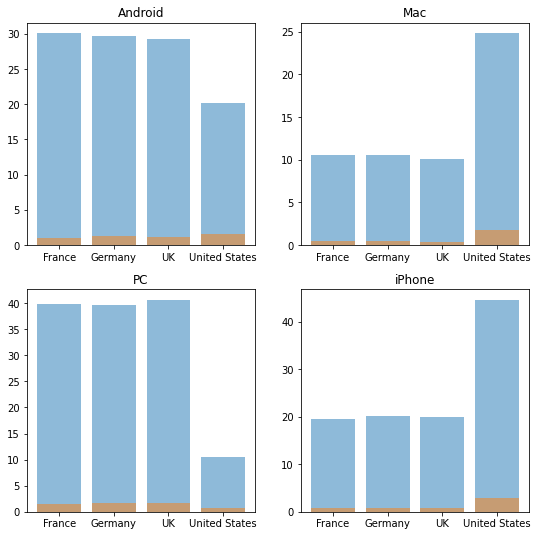

In [16]:
device = list(visits_device_1['first_device'].unique())


plt.figure(figsize=(9,9))
for i in range (0, len(device)):
    a = device[i]
    temp_1 = visits_device_1.query('first_device == @a ')
    temp_2 = visits_device_2.query('first_device == @a ')
    s = int(str(22)+str(i+1))
    display(temp_1)
    display(temp_2)
    plt.subplot(s)
    plt.title(a)
    plt.bar(temp_1["region"], temp_1['% of devices'], alpha = 0.5)
    plt.bar(temp_2["region"], temp_2['% of customers'], alpha = 0.5)

plt.show()



Regions are ok, however channels included missinformation about users history. For ROI and CAC analysis we need to clear the data.
Now, as we dont have instructions about channels priority  we rewrite in visits channel to the first occured channel by user 

In [17]:
visits_region_channel = visits.groupby(by=['region','first_channel'], as_index=False).agg({'user_id':'nunique'})
visit_region_customer = visits.query('customer == 1').groupby(by=['region','first_channel'], as_index=False).agg({'user_id':'nunique','region':'first','first_channel':'first'})

visits_region_channel= visits_region_channel.merge(visit_region_customer, on=['region','first_channel'])
visits_region_channel= visits_region_channel.merge(visits_region, on='region')
visits_region_channel.columns = ['region','first_channel','users','customers','region_users']
visits_region_channel['users%_of_region'] = round(visits_region_channel['users']/visits_region_channel['region_users'],4)*100
visits_region_channel['customer%_of_channel'] = round(visits_region_channel['customers']/visits_region_channel['region_users'],4)*100
region = list(visits_region_channel['region'].unique())

#display(visits_region_channel)
for i in region:
    display(visits_region_channel.query('region == @i '))


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
0,France,AdNonSense,1366,150,17444,7.83,0.86
1,France,LeapBob,2988,90,17444,17.13,0.52
2,France,OppleCreativeMedia,2991,80,17444,17.15,0.46
3,France,WahooNetBanner,2968,152,17444,17.01,0.87
4,France,lambdaMediaAds,742,82,17444,4.25,0.47
5,France,organic,6389,109,17444,36.63,0.62


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
6,Germany,AdNonSense,1219,142,14978,8.14,0.95
7,Germany,LeapBob,2518,69,14978,16.81,0.46
8,Germany,OppleCreativeMedia,2560,64,14978,17.09,0.43
9,Germany,WahooNetBanner,2579,148,14978,17.22,0.99
10,Germany,lambdaMediaAds,649,67,14978,4.33,0.45
11,Germany,organic,5453,126,14978,36.41,0.84


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
12,UK,AdNonSense,1295,148,17573,7.37,0.84
13,UK,LeapBob,3046,103,17573,17.33,0.59
14,UK,OppleCreativeMedia,3051,89,17573,17.36,0.51
15,UK,WahooNetBanner,3002,153,17573,17.08,0.87
16,UK,lambdaMediaAds,758,76,17573,4.31,0.43
17,UK,organic,6421,131,17573,36.54,0.75


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
18,United States,FaceBoom,29135,3557,99976,29.14,3.56
19,United States,MediaTornado,4363,156,99976,4.36,0.16
20,United States,RocketSuperAds,4447,352,99976,4.45,0.35
21,United States,TipTop,19556,1878,99976,19.56,1.88
22,United States,YRabbit,4312,165,99976,4.31,0.17
23,United States,organic,38163,794,99976,38.17,0.79


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
0,France,AdNonSense,1366,150,17444,7.83,0.86
1,France,LeapBob,2988,90,17444,17.13,0.52
2,France,OppleCreativeMedia,2991,80,17444,17.15,0.46
3,France,WahooNetBanner,2968,152,17444,17.01,0.87
4,France,lambdaMediaAds,742,82,17444,4.25,0.47
5,France,organic,6389,109,17444,36.63,0.62


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
6,Germany,AdNonSense,1219,142,14978,8.14,0.95
7,Germany,LeapBob,2518,69,14978,16.81,0.46
8,Germany,OppleCreativeMedia,2560,64,14978,17.09,0.43
9,Germany,WahooNetBanner,2579,148,14978,17.22,0.99
10,Germany,lambdaMediaAds,649,67,14978,4.33,0.45
11,Germany,organic,5453,126,14978,36.41,0.84


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
12,UK,AdNonSense,1295,148,17573,7.37,0.84
13,UK,LeapBob,3046,103,17573,17.33,0.59
14,UK,OppleCreativeMedia,3051,89,17573,17.36,0.51
15,UK,WahooNetBanner,3002,153,17573,17.08,0.87
16,UK,lambdaMediaAds,758,76,17573,4.31,0.43
17,UK,organic,6421,131,17573,36.54,0.75


,region,first_channel,users,customers,region_users,users%_of_region,customer%_of_channel
18,United States,FaceBoom,29135,3557,99976,29.14,3.56
19,United States,MediaTornado,4363,156,99976,4.36,0.16
20,United States,RocketSuperAds,4447,352,99976,4.45,0.35
21,United States,TipTop,19556,1878,99976,19.56,1.88
22,United States,YRabbit,4312,165,99976,4.31,0.17
23,United States,organic,38163,794,99976,38.17,0.79


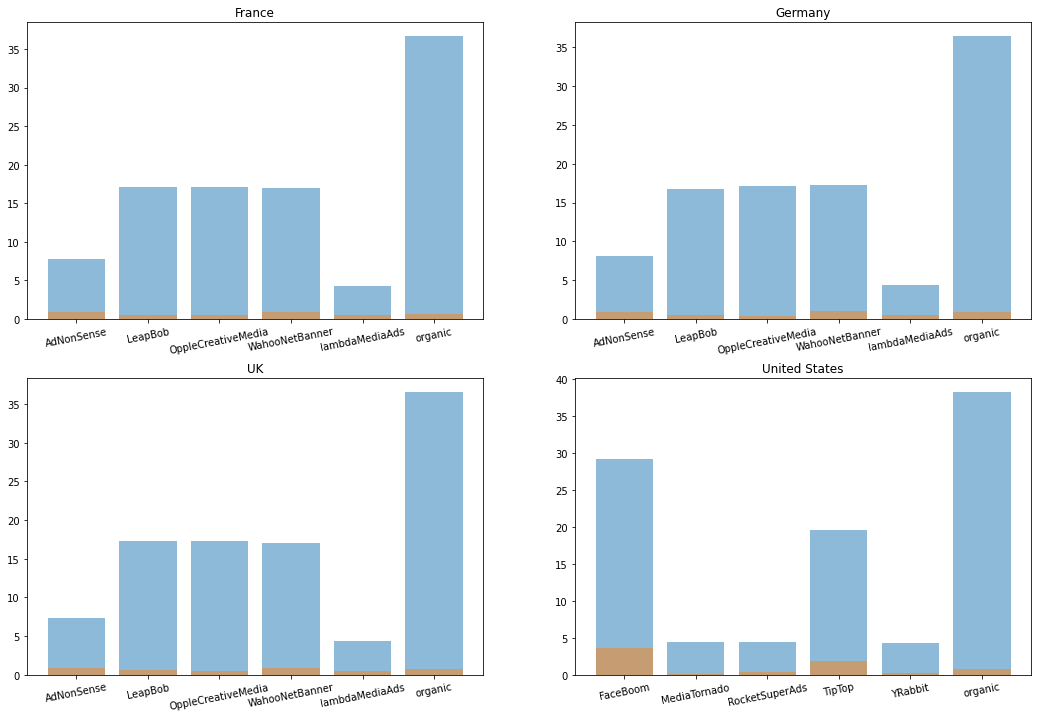

In [18]:
plt.figure(figsize=(18,12))


for i in range (0, len(region)):
    a = region[i]
    temp_1 = visits_region_channel.query('region == @a ')
    s = int(str(22)+str(i+1))
    display(temp_1)
    plt.subplot(s)
    plt.title(a)
    plt.bar(temp_1["first_channel"], temp_1['users%_of_region'], alpha = 0.5)
    plt.bar(temp_1["first_channel"], temp_1['customer%_of_channel'], alpha = 0.5)
    plt.xticks(rotation=11)

    
plt.show()

Users' and Customers' ratio among European countris are similar, difference in 1% range. Organic part  has simmilar customer ratio also in US, with a slighty better percentage. All countries have 6 channel to generate new_users. 

Let's check the devices distribution 

On the next step we will check the distribution of orders amount and revenue per user.

,count,mean,std,min,25%,50%,75%,max
event_dt,8881.0,4.527868,3.935765,1.00,1.00,3.00,7.00,22.00
revenue,8881.0,24.317406,22.381708,4.99,4.99,14.97,39.92,149.88


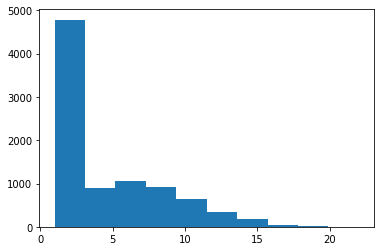

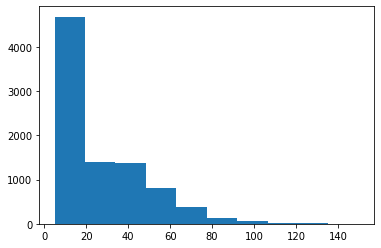

In [19]:
temp = orders.groupby('user_id', as_index = False).agg({'event_dt':'count','revenue':'sum'})
display(temp[['event_dt','revenue']].describe().T)

plt.hist(temp['event_dt'])
plt.show()

plt.hist(temp['revenue'])
plt.show()

Calculate CAC and ROI:

In [20]:
display(costs.head())
display(visits.head())

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


,user_id,region,device,channel,session_start,session_end,ses_len_min,customer,first_channel,first_device
0,382394863972,United States,Mac,MediaTornado,2019-05-01 00:00:41,2019-05-01 01:13:45,73.07,0,MediaTornado,Mac
1,428935481941,UK,PC,AdNonSense,2019-05-01 00:01:35,2019-05-01 02:30:30,148.92,0,AdNonSense,PC
2,428935481941,UK,PC,AdNonSense,2019-05-04 12:29:45,2019-05-04 13:14:34,44.82,0,AdNonSense,PC
3,86266511938,Germany,Android,organic,2019-05-01 00:02:38,2019-05-01 01:22:33,79.92,0,organic,Android
4,763000657462,UK,PC,organic,2019-05-01 00:04:21,2019-05-01 00:24:15,19.90,0,organic,PC


In [21]:
profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
profiles['dt'] = profiles['first_ts'].dt.date
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')


In [22]:
new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

In [23]:
ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

In [24]:
ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

In [25]:
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

In [26]:
profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

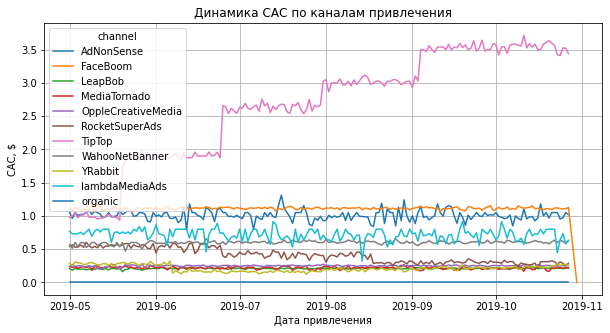

In [27]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [28]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

,user_id,first_ts,channel,device,region,dt,month,acquisition_cost,event_dt,revenue,lifetime
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,1.088172,2019-05-07 20:59:09,4.99,0.0
1,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,1.088172,2019-05-08 06:01:28,4.99,0.0
2,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,1.088172,2019-05-09 07:34:01,4.99,1.0
3,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,1.107237,NaT,NaN,NaN
4,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,0.000000,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
171590,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,1.117838,NaT,NaN,NaN
171591,999954865738,2019-07-25 08:47:56,organic,PC,UK,2019-07-25,2019-07-01,0.000000,NaT,NaN,NaN
171592,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,3.500000,NaT,NaN,NaN
171593,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,2.600000,NaT,NaN,NaN


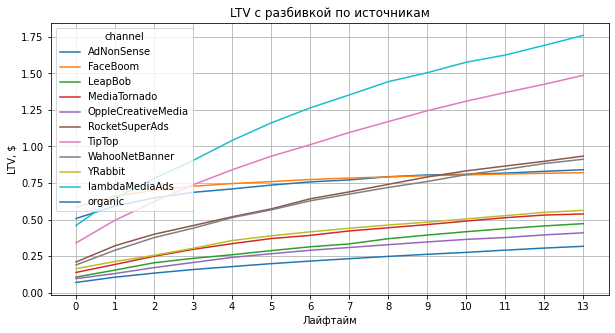

In [29]:
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, orders, datetime(2019, 10, 30).date(), 14, dimensions=['channel']
)

# таблица LTV
display(ltv_raw)

# кривые LTV
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

In [30]:
# находим максимальную дату привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

,user_id
dt,
2019-05-01,907
2019-05-02,759
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-13,796
2019-10-14,712
2019-10-15,674


In [31]:
# считаем средний CAC по каналам привлечения

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

,cac
channel,
AdNonSense,1.007885
FaceBoom,1.113975
LeapBob,0.209974
MediaTornado,0.219191
OppleCreativeMedia,0.249969
RocketSuperAds,0.418763
TipTop,2.746726
WahooNetBanner,0.602262
YRabbit,0.216967


In [32]:
roi = ltv.div(cac['cac'], axis=0)
roi

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3.636326e+03,0.503435,0.587739,0.643128,0.680955,0.704191,0.730136,0.751750,0.765259,0.786881,0.799039,0.803362,0.811468,0.823625,0.834441
FaceBoom,2.437757e+04,0.525174,0.592386,0.628053,0.653327,0.669990,0.681867,0.694767,0.703908,0.710705,0.718328,0.723145,0.728589,0.733210,0.736839
LeapBob,3.804286e+04,0.508231,0.737329,0.975335,1.119337,1.236557,1.370441,1.495991,1.588820,1.758512,1.877515,1.987599,2.085782,2.175034,2.249411
MediaTornado,1.883744e+04,0.633011,0.882237,1.136977,1.352106,1.529745,1.689649,1.788893,1.926744,2.026010,2.125254,2.235537,2.340294,2.422998,2.457195
OppleCreativeMedia,3.207600e+04,0.384917,0.524361,0.687235,0.826673,0.966641,1.066229,1.160843,1.237031,1.314257,1.388953,1.459164,1.509457,1.581704,1.638967
RocketSuperAds,1.003192e+04,0.501573,0.767128,0.954335,1.096159,1.240256,1.368466,1.533039,1.646503,1.769092,1.889389,1.989234,2.068661,2.145814,2.230908
TipTop,6.639176e+03,0.123983,0.180398,0.226410,0.268638,0.306002,0.339678,0.368373,0.398742,0.425923,0.452884,0.476735,0.498313,0.518959,0.541215
WahooNetBanner,1.321352e+04,0.315300,0.482142,0.625223,0.732467,0.852625,0.940294,1.043436,1.119440,1.194828,1.262506,1.340801,1.399731,1.466372,1.515517
YRabbit,1.867566e+04,0.756265,0.984451,1.177433,1.401081,1.645260,1.792834,1.917705,2.031235,2.133402,2.224217,2.326383,2.428573,2.531877,2.594313


In [33]:
display(ltv)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3665,0.507405,0.592374,0.648199,0.686325,0.709744,0.735894,0.757678,0.771293,0.793086,0.805340,0.809697,0.817866,0.830120,0.841020
FaceBoom,27156,0.585031,0.659903,0.699635,0.727789,0.746352,0.759583,0.773953,0.784136,0.791708,0.800199,0.805566,0.811629,0.816778,0.820820
LeapBob,7988,0.106715,0.154820,0.204795,0.235031,0.259644,0.287757,0.314119,0.333610,0.369241,0.394229,0.417344,0.437959,0.456700,0.472317
MediaTornado,4129,0.138750,0.193379,0.249215,0.296370,0.335306,0.370356,0.392109,0.422325,0.444083,0.465837,0.490010,0.512972,0.531100,0.538595
OppleCreativeMedia,8018,0.096217,0.131074,0.171787,0.206643,0.241630,0.266524,0.290175,0.309219,0.328523,0.347195,0.364746,0.377317,0.395377,0.409691
RocketSuperAds,4201,0.210040,0.321245,0.399641,0.459031,0.519374,0.573064,0.641980,0.689495,0.740831,0.791207,0.833018,0.866279,0.898588,0.934223
TipTop,18236,0.340548,0.495503,0.621887,0.737874,0.840503,0.933003,1.011819,1.095235,1.169894,1.243949,1.309460,1.368731,1.425437,1.486571
WahooNetBanner,7958,0.189893,0.290376,0.376548,0.441137,0.513503,0.566303,0.628422,0.674196,0.719599,0.760359,0.807513,0.843005,0.883140,0.912738
YRabbit,4052,0.164084,0.213593,0.255464,0.303988,0.356967,0.388986,0.416078,0.440711,0.462878,0.482581,0.504748,0.526920,0.549334,0.562880


In [34]:
roi.loc[:,'cohort_size'] = ltv['cohort_size']
roi

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3665,0.503435,0.587739,0.643128,0.680955,0.704191,0.730136,0.751750,0.765259,0.786881,0.799039,0.803362,0.811468,0.823625,0.834441
FaceBoom,27156,0.525174,0.592386,0.628053,0.653327,0.669990,0.681867,0.694767,0.703908,0.710705,0.718328,0.723145,0.728589,0.733210,0.736839
LeapBob,7988,0.508231,0.737329,0.975335,1.119337,1.236557,1.370441,1.495991,1.588820,1.758512,1.877515,1.987599,2.085782,2.175034,2.249411
MediaTornado,4129,0.633011,0.882237,1.136977,1.352106,1.529745,1.689649,1.788893,1.926744,2.026010,2.125254,2.235537,2.340294,2.422998,2.457195
OppleCreativeMedia,8018,0.384917,0.524361,0.687235,0.826673,0.966641,1.066229,1.160843,1.237031,1.314257,1.388953,1.459164,1.509457,1.581704,1.638967
RocketSuperAds,4201,0.501573,0.767128,0.954335,1.096159,1.240256,1.368466,1.533039,1.646503,1.769092,1.889389,1.989234,2.068661,2.145814,2.230908
TipTop,18236,0.123983,0.180398,0.226410,0.268638,0.306002,0.339678,0.368373,0.398742,0.425923,0.452884,0.476735,0.498313,0.518959,0.541215
WahooNetBanner,7958,0.315300,0.482142,0.625223,0.732467,0.852625,0.940294,1.043436,1.119440,1.194828,1.262506,1.340801,1.399731,1.466372,1.515517
YRabbit,4052,0.756265,0.984451,1.177433,1.401081,1.645260,1.792834,1.917705,2.031235,2.133402,2.224217,2.326383,2.428573,2.531877,2.594313


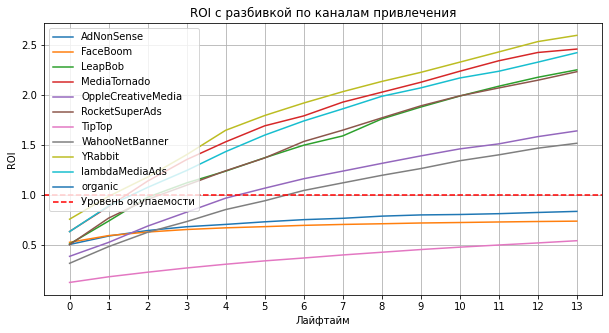

In [35]:
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

### Проанализируйте окупаемость рекламы с разбивкой по странам

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.